In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv("../data/dairy_cows.csv")

columns_to_remove=['ID', 'Species','Hazards_Source_1',	'Hazards_Source_2',	'Global_Usage', 'WQ_Principles', 'WQ_Criteria',	'Norway_Usage', 'Welfare_Hazards_Animal', 'Welfare_Indicator']
df.drop(columns=columns_to_remove, inplace=True)
df.head() 

,Animal_Class,Welfare_Hazards_Consequences,Welfare_Hazards_Affective_States,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Indicator_Type,Indicator_Dimensions,Indicator_Ease,Indicator_Resources
0,Tie stalls,Gastro-enteric disorders,Discomfort,High,Moderate,Welfare outcome,Health/physical/production,Moderate,Low
1,Cubicles,Gastro-enteric disorders,Discomfort,High,Moderate,Welfare outcome,Health/physical/production,Moderate,Low
2,Tie stalls,General disruption of behaviour,Di(stress),Low,Difficult,Welfare outcome,Behavioural,Moderate,Low
3,Cubicles,General disruption of behaviour,Di(stress),Low,Difficult,Welfare outcome,Behavioural,Moderate,Low
4,Tie stalls,Restriction of movement,Discomfort,High,Moderate,Welfare outcome,Behavioural,Moderate,Medium


In [59]:
hazards_severity_mapping = {
    'Environmental stress': 'Minor',
    'Heat stress': 'Minor',
    'Cold stress': 'Minor',
    'Handling stress': 'Minor',
    'Separation stress': 'Minor',
    'General disruption of behaviour': 'Moderate',
    'Group (social) stress': 'Moderate',
    'Resting problems': 'Moderate',
    'Restriction of movement': 'Moderate',
    'Inability to perform comfort behaviour': 'Moderate',
    'Inability to chew and/or ruminate': 'Moderate',
    'Soft tissue lesions and integument damage': 'Moderate',
    'Gastro-enteric disorders': 'Severe',
    'Bone lesions (incl. fractures and dislocations)': 'Severe',
    'Locomotor disorders (including lameness)': 'Severe',
    'Reproductive disorders': 'Severe',
    'Mastitis': 'Severe',
    'Skin disorders (other than soft tissue lesions and integument damage)': 'Severe',
    'Metabolic disorders': 'Severe',
    'Prolonged hunger': 'Severe',
    'Mortality': 'Severe',
    'Isolation stress': 'Severe'
}

df['Hazards_Severity'] = df['Welfare_Hazards_Consequences'].map(hazards_severity_mapping)

# Drop 'Welfare_Hazards_Consequences' after mapping
df = df.drop(columns=['Welfare_Hazards_Consequences'], errors='ignore')
df

,Animal_Class,Welfare_Hazards_Affective_States,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Indicator_Type,Indicator_Dimensions,Indicator_Ease,Indicator_Resources,Hazards_Severity
0,Tie stalls,Discomfort,High,Moderate,Welfare outcome,Health/physical/production,Moderate,Low,Severe
1,Cubicles,Discomfort,High,Moderate,Welfare outcome,Health/physical/production,Moderate,Low,Severe
2,Tie stalls,Di(stress),Low,Difficult,Welfare outcome,Behavioural,Moderate,Low,Moderate
3,Cubicles,Di(stress),Low,Difficult,Welfare outcome,Behavioural,Moderate,Low,Moderate
4,Tie stalls,Discomfort,High,Moderate,Welfare outcome,Behavioural,Moderate,Medium,Moderate
...,...,...,...,...,...,...,...,...,...
383,Tie stalls,Di(stress),High,Easy,Welfare outcome,Behavioural,Moderate,Medium,Minor
384,Cubicles,Discomfort,High,Moderate,Welfare outcome,Behavioural,Difficult,High,Moderate
385,Tie stalls,Discomfort,High,Moderate,Welfare outcome,Behavioural,Difficult,High,Moderate
386,Cubicles,Discomfort,High,Moderate,Welfare outcome,Health/physical/production,Easy,Low,Severe


In [62]:
# One-Hot Encoding for categorical fields
one_hot_fields = ["Animal_Class", "Welfare_Hazards_Affective_States", "Indicator_Type", "Indicator_Dimensions"]
data_encoded = pd.get_dummies(df, columns=one_hot_fields, prefix=one_hot_fields)

# Ordinal Encoding for fields with inherent order
ordinal_mappings = {
    "Welfare_Hazards_Impact": {"Low": 1, "High": 2},
    "Ease_of_Hazard_Mitigation": {"Moderate": 1, "Difficult": 2},
    "Indicator_Ease": {"Moderate": 1},
    "Indicator_Resources": {"Low": 1, "Medium": 2},
    "Hazards_Severity": {"Minor": 1, "Moderate": 2, "Severe": 3}
}

for field, mapping in ordinal_mappings.items():
    data_encoded[field] = data_encoded[field].map(mapping)

In [63]:
data_encoded

,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Indicator_Ease,Indicator_Resources,Hazards_Severity,Animal_Class_Cubicles,Animal_Class_Tie stalls,Welfare_Hazards_Affective_States_Di(stress),Welfare_Hazards_Affective_States_Discomfort,Welfare_Hazards_Affective_States_Fatigue,Welfare_Hazards_Affective_States_Fear,Welfare_Hazards_Affective_States_Frustration,Welfare_Hazards_Affective_States_Pain,Indicator_Type_Management input,Indicator_Type_Welfare outcome,Indicator_Dimensions_Behavioural,Indicator_Dimensions_Health/physical/production,Indicator_Dimensions_Health/physical/production
0,2,1.0,1.0,1.0,3,False,True,False,True,False,False,False,False,False,True,False,True,False
1,2,1.0,1.0,1.0,3,True,False,False,True,False,False,False,False,False,True,False,True,False
2,1,2.0,1.0,1.0,2,False,True,True,False,False,False,False,False,False,True,True,False,False
3,1,2.0,1.0,1.0,2,True,False,True,False,False,False,False,False,False,True,True,False,False
4,2,1.0,1.0,2.0,2,False,True,False,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2,NaN,1.0,2.0,1,False,True,True,False,False,False,False,False,False,True,True,False,False
384,2,1.0,NaN,NaN,2,True,False,False,True,False,False,False,False,False,True,True,False,False
385,2,1.0,NaN,NaN,2,False,True,False,True,False,False,False,False,False,True,True,False,False
386,2,1.0,NaN,1.0,3,True,False,False,True,False,False,False,False,False,True,False,True,False


Explained Variance Ratios:
   Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                  PC1              1.993430e-01                   0.199343
1                  PC2              1.475932e-01                   0.346936
2                  PC3              1.201112e-01                   0.467047
3                  PC4              1.110000e-01                   0.578047
4                  PC5              7.655465e-02                   0.654602
5                  PC6              7.331362e-02                   0.727916
6                  PC7              6.180282e-02                   0.789719
7                  PC8              5.652927e-02                   0.846248
8                  PC9              5.066181e-02                   0.896910
9                 PC10              4.124779e-02                   0.938157
10                PC11              2.414462e-02                   0.962302
11                PC12              1.680165e-02             

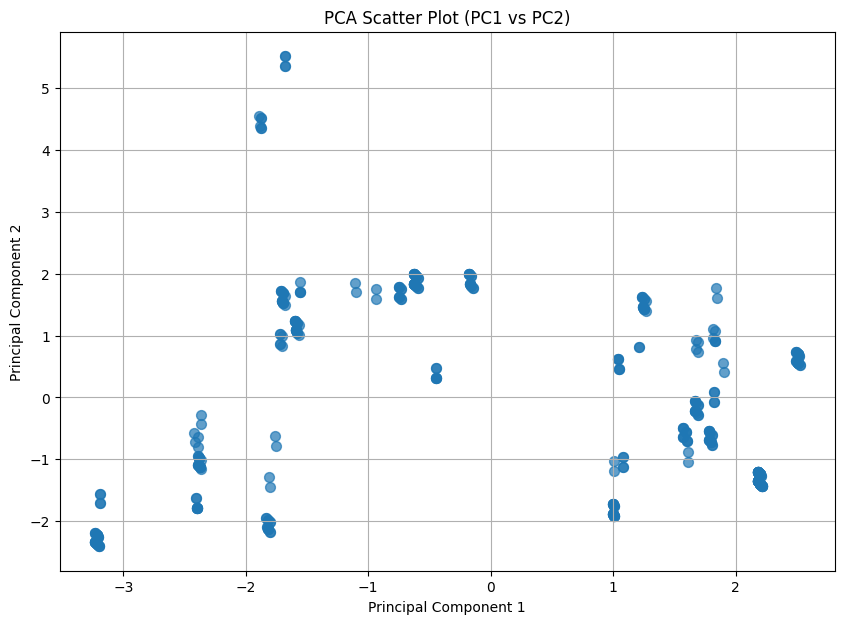

In [64]:


# Standardize the data for PCA
data_standardized = StandardScaler().fit_transform(data_encoded.fillna(0))

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_standardized)

# Create a DataFrame for explained variance ratios
explained_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained Variance Ratio": pca.explained_variance_ratio_,
    "Cumulative Variance Ratio": pca.explained_variance_ratio_.cumsum()
})

# Save or display explained variance
print("Explained Variance Ratios:")
print(explained_variance)

# PCA Scatter Plot for the first two components
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.grid()
plt.show()


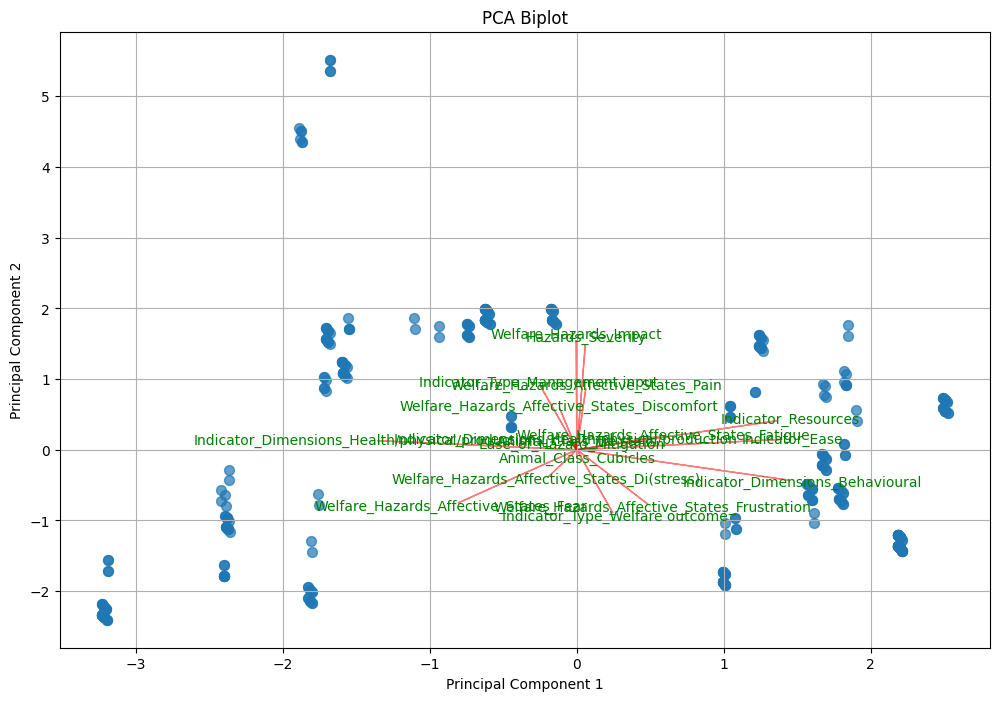

In [65]:
# Create a biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, alpha=0.7, s=50)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Biplot")
    
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0]*3, coeff[i, 1]*3, color='red', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0]*3.2, coeff[i, 1]*3.2, labels[i], color='green', ha='center', va='center')
    
    plt.grid()
    plt.show()

biplot(pca_result, pca.components_.T, labels=data_encoded.columns)

Top Features Influencing PC1:
                                  Feature  PC1 Loading
0                  Welfare_Hazards_Impact     0.512168
4                        Hazards_Severity     0.495570
14         Indicator_Type_Welfare outcome    -0.296644
13        Indicator_Type_Management input     0.296644
12  Welfare_Hazards_Affective_States_Pain     0.286383


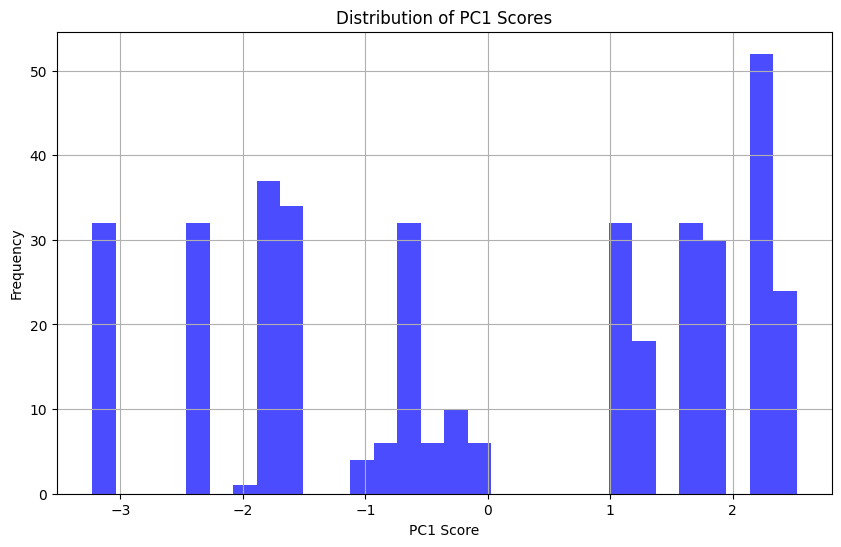

Correlations of PC1 with Encoded Features:
PC1_Score                                           1.000000
Indicator_Dimensions_Behavioural                    0.907407
Indicator_Resources                                 0.728839
Welfare_Hazards_Affective_States_Fatigue            0.348021
Welfare_Hazards_Affective_States_Frustration        0.304250
Indicator_Type_Welfare outcome                      0.154420
Ease_of_Hazard_Mitigation                           0.053465
Welfare_Hazards_Affective_States_Pain               0.038404
Hazards_Severity                                    0.036369
Animal_Class_Cubicles                               0.000973
Animal_Class_Tie stalls                            -0.000973
Welfare_Hazards_Impact                             -0.002474
Indicator_Dimensions_Health/physical/production    -0.035648
Welfare_Hazards_Affective_States_Discomfort        -0.072081
Welfare_Hazards_Affective_States_Di(stress)        -0.124810
Indicator_Type_Management input           

In [75]:
# Analyze PC1 Contributions
pc1_loadings = pca.components_[1]
pc1_features = pd.DataFrame({
    "Feature": data_encoded.columns,
    "PC1 Loading": pc1_loadings
}).sort_values(by="PC1 Loading", key=abs, ascending=False)

print("Top Features Influencing PC1:")
print(pc1_features.head())

# Add PC1 scores to the dataset
data_with_pc1 = data_encoded.copy()
data_with_pc1['PC1_Score'] = pca_result[:, 0]

# Analyze PC1 distribution
plt.figure(figsize=(10, 6))
plt.hist(data_with_pc1['PC1_Score'], bins=30, alpha=0.7, color='blue')
plt.xlabel('PC1 Score')
plt.ylabel('Frequency')
plt.title('Distribution of PC1 Scores')
plt.grid()
plt.show()

# Correlation of PC1 with other features
pc1_correlations = data_with_pc1.corr()['PC1_Score'].sort_values(ascending=False)
print("Correlations of PC1 with Encoded Features:")
print(pc1_correlations)

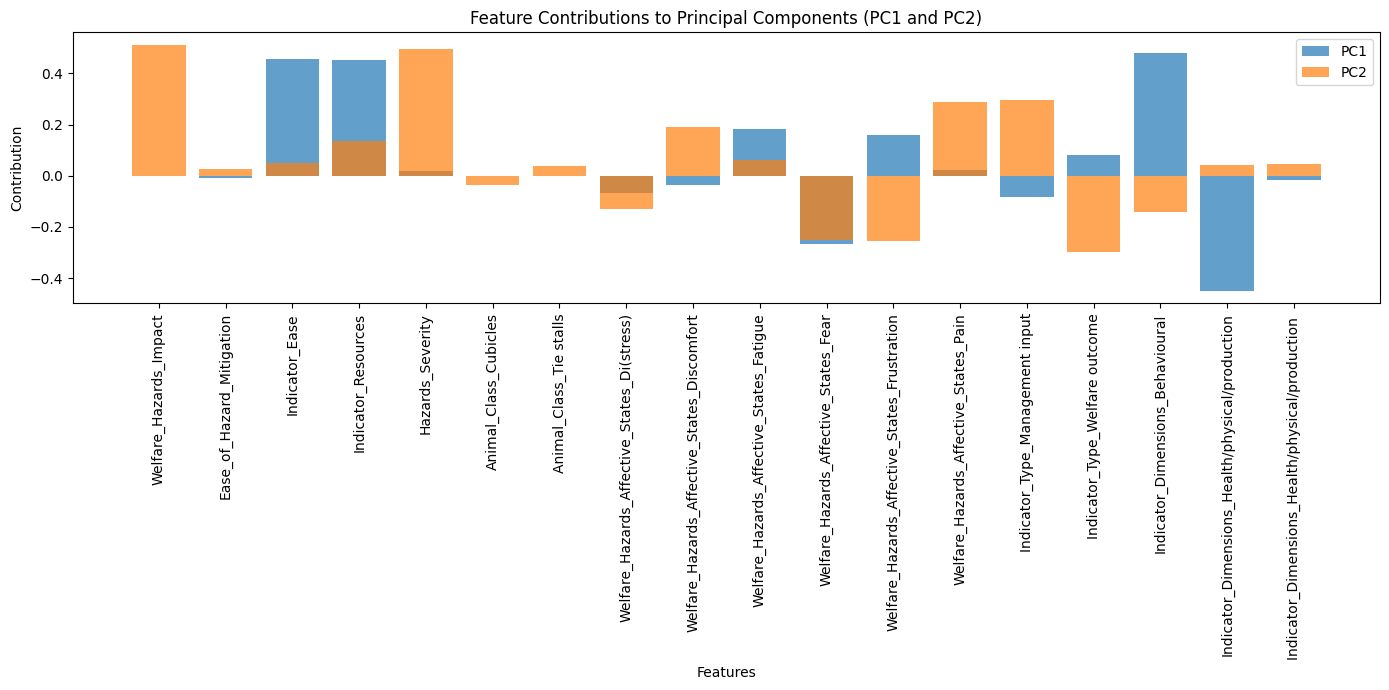

In [67]:
loadings = pd.DataFrame(
    pca.components_,
    index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    columns=data_encoded.columns
)

# Visualizing the contributions of features to the first two principal components
plt.figure(figsize=(14, 7))
plt.bar(loadings.columns, loadings.loc['PC1'], alpha=0.7, label='PC1')
plt.bar(loadings.columns, loadings.loc['PC2'], alpha=0.7, label='PC2')
plt.xticks(rotation=90)
plt.title('Feature Contributions to Principal Components (PC1 and PC2)')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.legend()
plt.tight_layout()
plt.show()

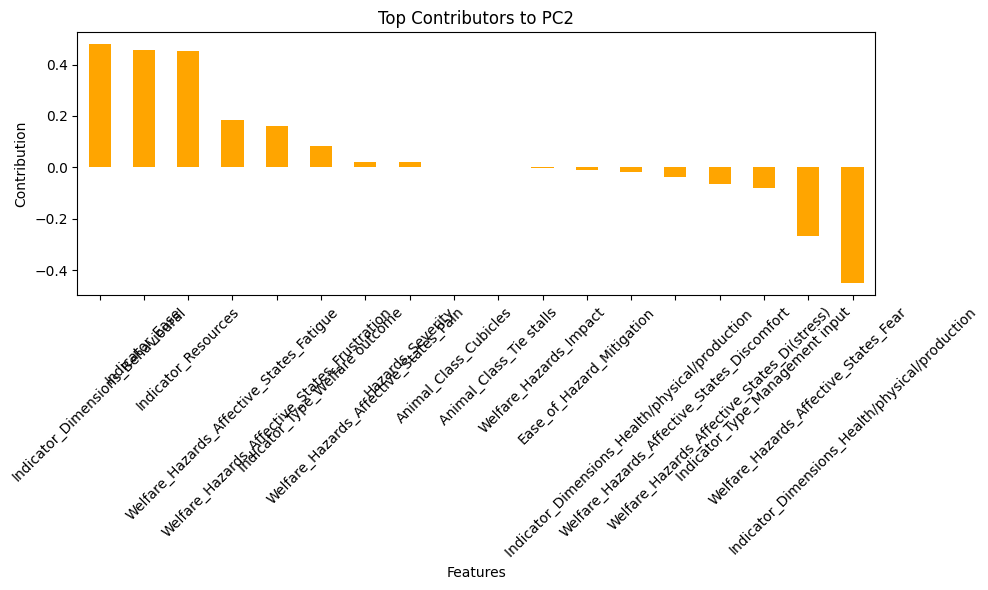

In [68]:
top_contributors_pc1= loadings.loc['PC1'].sort_values(ascending=False)

# Visualizing the top contributors
plt.figure(figsize=(10, 6))
top_contributors_pc1.plot(kind='bar', color='orange')
plt.title('Top Contributors to PC2')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



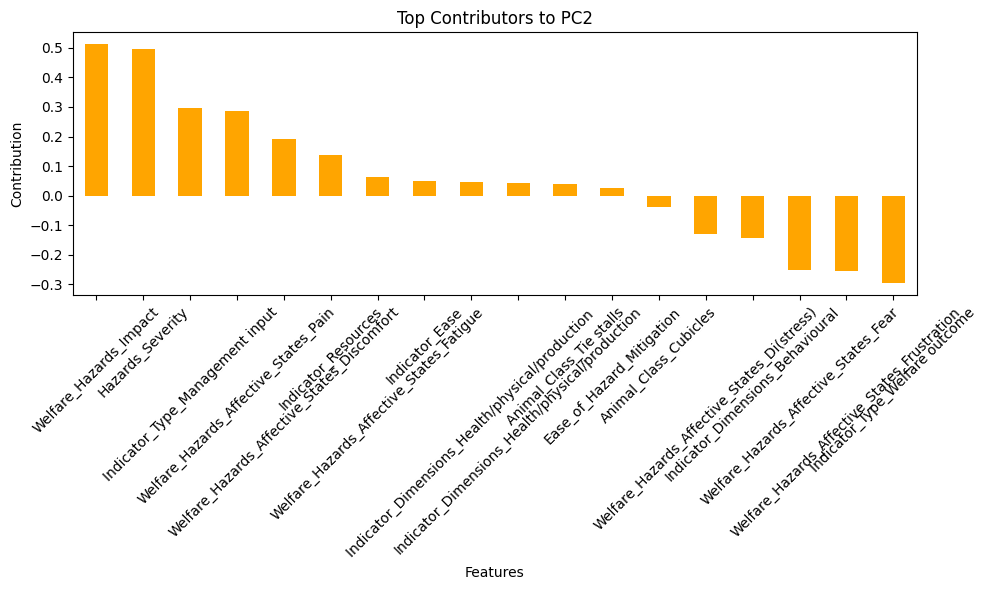

In [69]:
top_contributors_pc2 = loadings.loc['PC2'].sort_values(ascending=False)

# Visualizing the top contributors
plt.figure(figsize=(10, 6))
top_contributors_pc2.plot(kind='bar', color='orange')
plt.title('Top Contributors to PC2')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

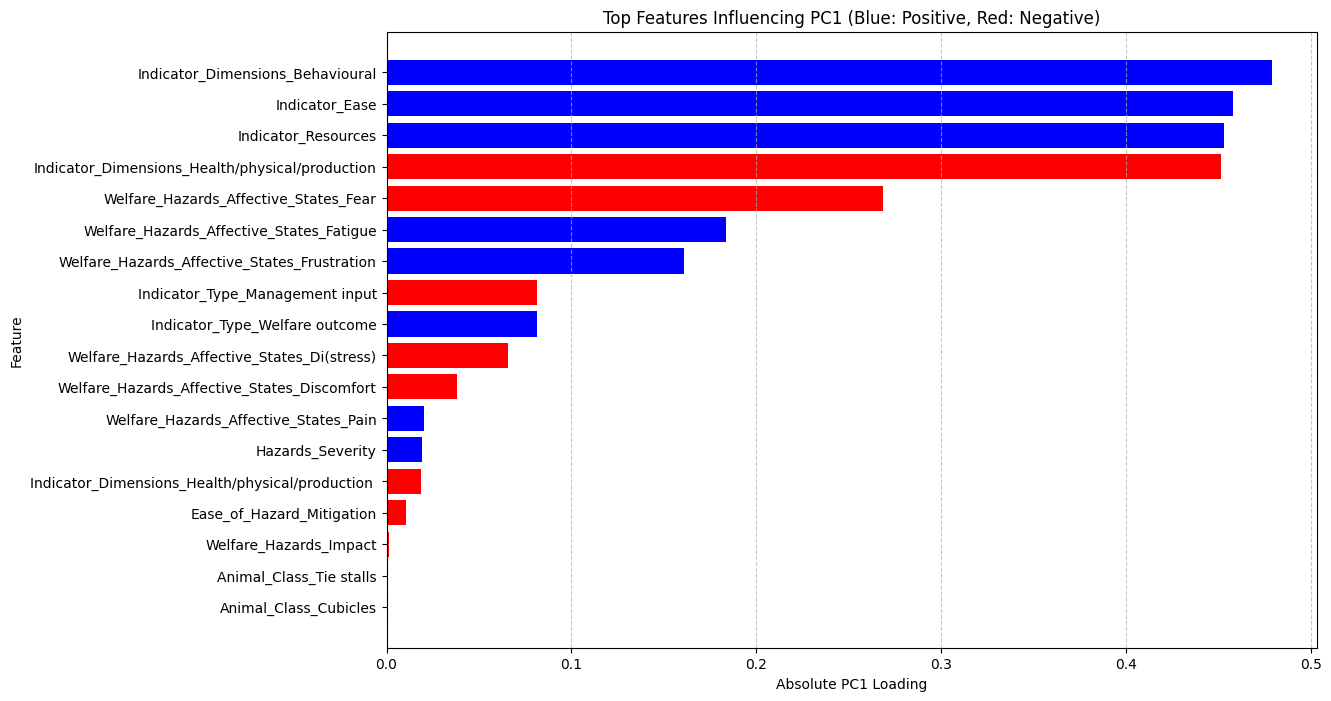

In [70]:
import matplotlib.pyplot as plt

# Extract the loadings for PC1
pc1_loadings = pca.components_[0]

# Create a DataFrame for PC1 loadings
pc1_features = pd.DataFrame({
    "Feature": data_encoded.columns,
    "PC1 Loading": pc1_loadings
}).sort_values(by="PC1 Loading", key=abs, ascending=False)

# Select the top N features (e.g., 30)
top_n = 20
top_features = pc1_features.head(top_n)

# Determine colors based on loading signs
colors = ['blue' if loading > 0 else 'red' for loading in top_features['PC1 Loading']]

# Plot the top features with colors indicating positive or negative loadings
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], abs(top_features['PC1 Loading']), color=colors)
plt.xlabel("Absolute PC1 Loading")
plt.ylabel("Feature")
plt.title("Top Features Influencing PC1 (Blue: Positive, Red: Negative)")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest loading at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


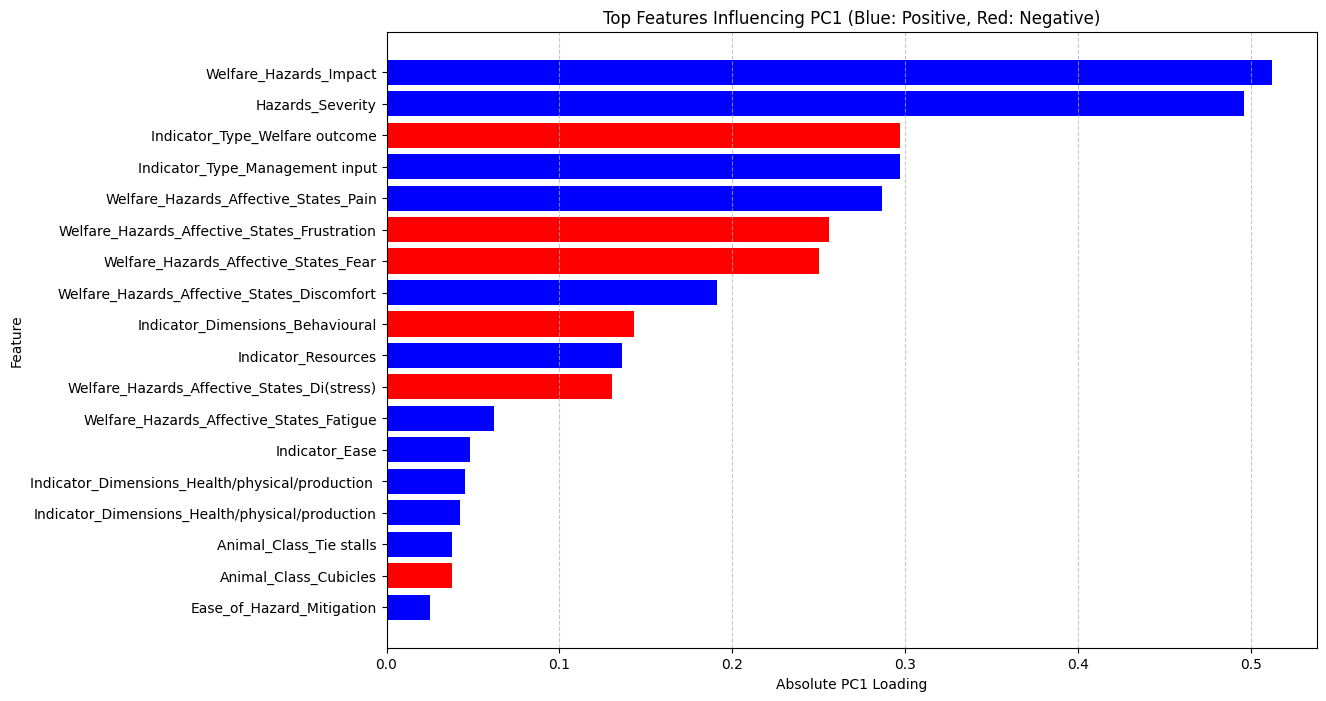

In [71]:
import matplotlib.pyplot as plt

# Extract the loadings for PC1
pc1_loadings = pca.components_[1]

# Create a DataFrame for PC1 loadings
pc1_features = pd.DataFrame({
    "Feature": data_encoded.columns,
    "PC1 Loading": pc1_loadings
}).sort_values(by="PC1 Loading", key=abs, ascending=False)

# Select the top N features (e.g., 30)
top_n = 20
top_features = pc1_features.head(top_n)

# Determine colors based on loading signs
colors = ['blue' if loading > 0 else 'red' for loading in top_features['PC1 Loading']]

# Plot the top features with colors indicating positive or negative loadings
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], abs(top_features['PC1 Loading']), color=colors)
plt.xlabel("Absolute PC1 Loading")
plt.ylabel("Feature")
plt.title("Top Features Influencing PC1 (Blue: Positive, Red: Negative)")
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest loading at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [72]:
# Extracting the loadings for PC1 and PC2
pc1_loadings = loadings.loc['PC1']
pc2_loadings = loadings.loc['PC2']

# Creating a DataFrame to show PC1 and PC2 loadings for all variables
loadings_df = pd.DataFrame({'PC1 Loadings': pc1_loadings, 'PC2 Loadings': pc2_loadings})
loadings_df_sorted = loadings_df.sort_values(by=['PC1 Loadings', 'PC2 Loadings'], ascending=False)
loadings_df_sorted

,PC1 Loadings,PC2 Loadings
Indicator_Dimensions_Behavioural,0.479033,-0.143032
Indicator_Ease,0.457909,0.048106
Indicator_Resources,0.452892,0.136286
Welfare_Hazards_Affective_States_Fatigue,0.183725,0.061943
Welfare_Hazards_Affective_States_Frustration,0.160618,-0.255716
Indicator_Type_Welfare outcome,0.081521,-0.296644
Welfare_Hazards_Affective_States_Pain,0.020274,0.286383
Hazards_Severity,0.019200,0.495570
Animal_Class_Cubicles,0.000514,-0.037785
Animal_Class_Tie stalls,-0.000514,0.037785


/var/folders/0l/0_k60hjn72g4s56_ff84bnvw0000gn/T/ipykernel_40218/1788031290.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.loc['PC1'][i], loadings.loc['PC2'][i], txt, fontsize=9, ha='right')


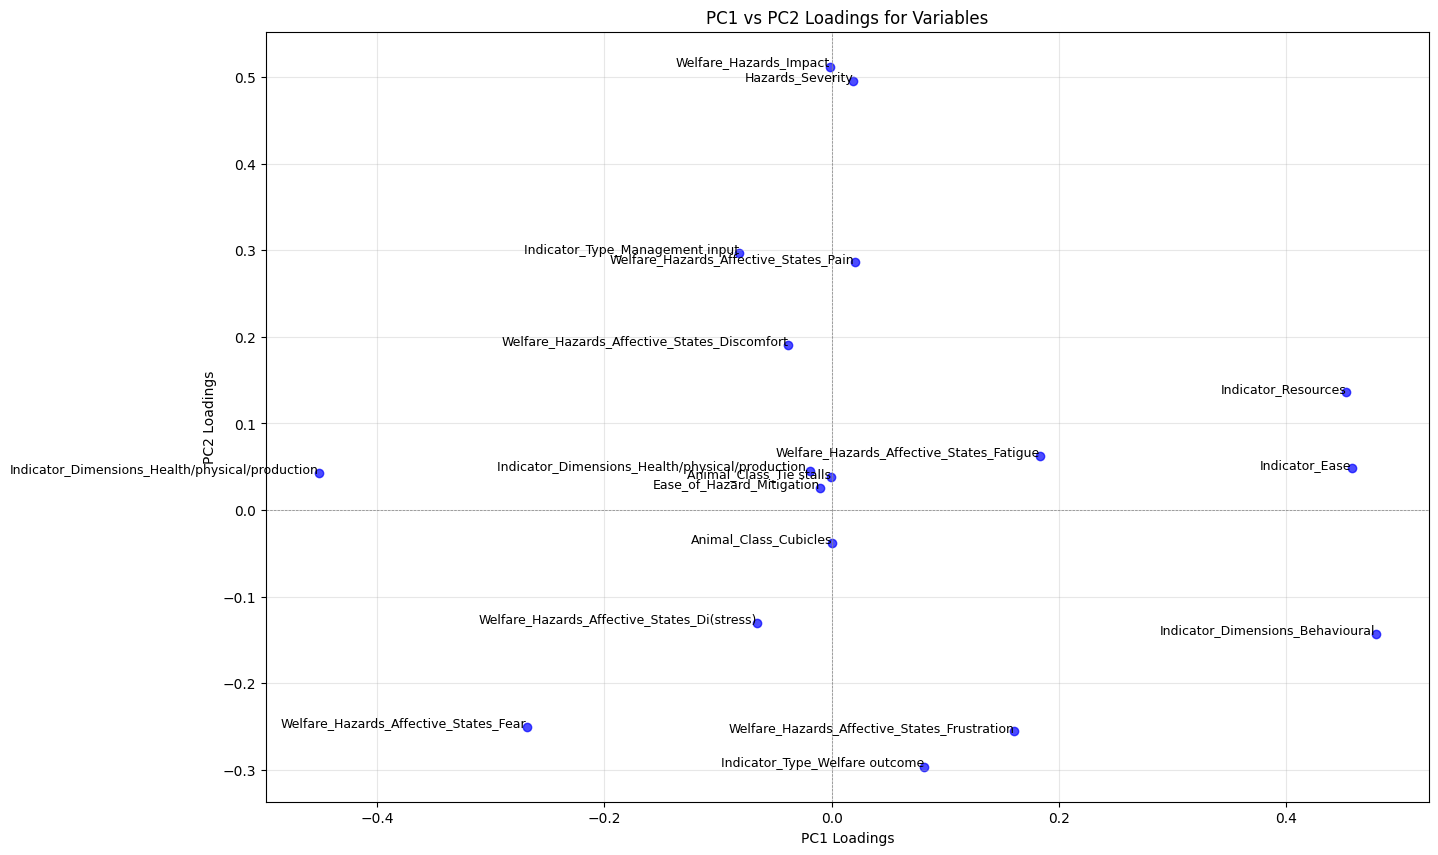

In [73]:
plt.figure(figsize=(15, 10))
plt.scatter(loadings.loc['PC1'], loadings.loc['PC2'], color='blue', alpha=0.7)

# Annotating each variable
for i, txt in enumerate(loadings_df.index):
    plt.text(loadings.loc['PC1'][i], loadings.loc['PC2'][i], txt, fontsize=9, ha='right')

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title('PC1 vs PC2 Loadings for Variables')
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.grid(alpha=0.3)
plt.show()

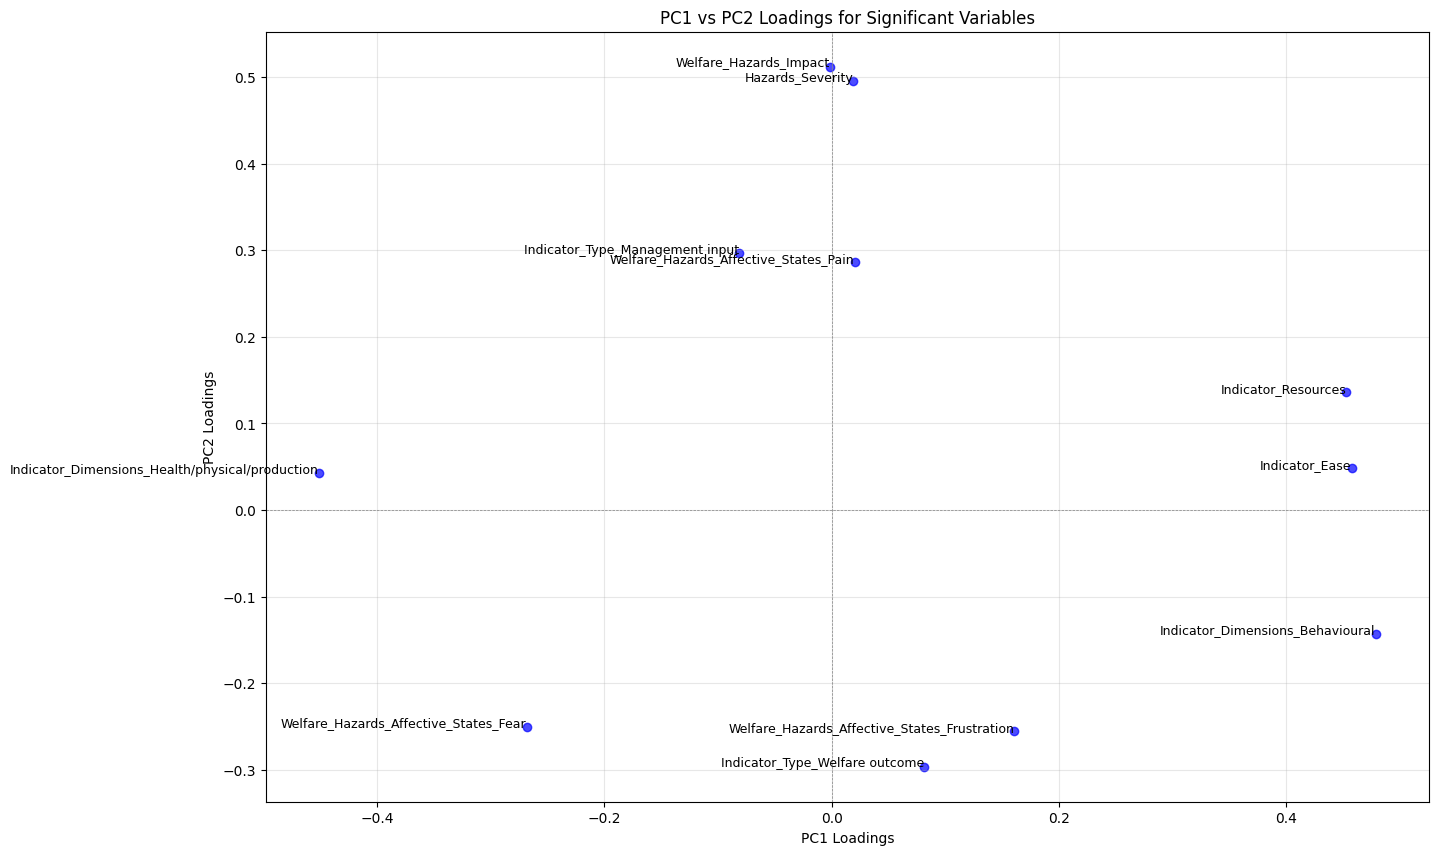

In [74]:
# Filter loadings to exclude low values
threshold = 0.2  # Define a threshold for significant loadings
significant_loadings = loadings.loc[:, (loadings.loc['PC1'].abs() > threshold) | (loadings.loc['PC2'].abs() > threshold)]

# Plot scatter plot for filtered loadings
plt.figure(figsize=(15, 10))
plt.scatter(significant_loadings.loc['PC1'], significant_loadings.loc['PC2'], color='blue', alpha=0.7)

# Annotating each significant variable
for feature in significant_loadings.columns:
    plt.text(significant_loadings.loc['PC1', feature], significant_loadings.loc['PC2', feature], feature, fontsize=9, ha='right')

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title('PC1 vs PC2 Loadings for Significant Variables')
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.grid(alpha=0.3)
plt.show()


In [54]:
loadings[(loadings.loc['PC1'].abs() > threshold)]

/var/folders/0l/0_k60hjn72g4s56_ff84bnvw0000gn/T/ipykernel_40218/819410685.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loadings[(loadings.loc['PC1'].abs() > threshold)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).